In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import csv
import numpy as np # vecto
import random # random value

import seaborn as sns #vizuline
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

onefig_size = (10,4)
multifigs_size = (12,4)

In [ ]:
path_data = "/content/drive/MyDrive/BUSINESS_INTELLIGENCE/BigMartSales Prediction/supermarket_sales - Sheet1.csv"
supermarket_df = pd.read_csv(path_data)
supermarket_df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [ ]:
total_unit = supermarket_df['Unit price'].sum()
total_quantity = supermarket_df['Quantity'].sum()
total_tax = supermarket_df['Tax 5%'].sum()
total_total = supermarket_df['Total'].sum()
total_cogs = supermarket_df['cogs'].sum()
total_gmp = supermarket_df['gross margin percentage'].sum()
total_grossincome = supermarket_df['gross income'].sum()
print("Tổng các giá trị trong cột total_unit là:", total_unit)
print("Tổng các giá trị trong cột Quantity là:", total_quantity)
print("Tổng các giá trị trong cột total_tax là:", total_tax)
print("Tổng các giá trị trong cột total_total là:", total_total)
print("Tổng các giá trị trong cột total_cogs là:", total_cogs)
print("Tổng các giá trị trong cột total_gmp là:", total_gmp)
print("Tổng các giá trị trong cột total_grossincome là:", total_grossincome)


Tổng các giá trị trong cột total_unit là: 55672.130000000005
Tổng các giá trị trong cột Quantity là: 5510
Tổng các giá trị trong cột total_tax là: 15379.368999999999
Tổng các giá trị trong cột total_total là: 322966.749
Tổng các giá trị trong cột total_cogs là: 307587.38
Tổng các giá trị trong cột total_gmp là: 4761.904762
Tổng các giá trị trong cột total_grossincome là: 15379.368999999999


In [ ]:
supermarket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
missing_values = supermarket_df.isnull().sum()
missing_values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
supermarket_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
supermarket_df['Gender']

0      Female
1      Female
2        Male
3        Male
4        Male
        ...  
995      Male
996    Female
997      Male
998      Male
999    Female
Name: Gender, Length: 1000, dtype: object

In [ ]:
set(supermarket_df['Branch'])

{'A', 'B', 'C'}

In [ ]:
set(supermarket_df['Customer type'])

{'Member', 'Normal'}

In [ ]:
set(supermarket_df['Gender'])

{'Female', 'Male'}

In [ ]:
set(supermarket_df['City'])

{'Mandalay', 'Naypyitaw', 'Yangon'}

In [ ]:
set(supermarket_df['Product line'])

{'Electronic accessories',
 'Fashion accessories',
 'Food and beverages',
 'Health and beauty',
 'Home and lifestyle',
 'Sports and travel'}

In [ ]:
set(supermarket_df['Payment'])

{'Cash', 'Credit card', 'Ewallet'}

In [ ]:
supermarket_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
df = supermarket_df.copy()

In [ ]:
dup_ind = df.duplicated()
df[dup_ind]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


<Axes: xlabel='Branch', ylabel='Count'>

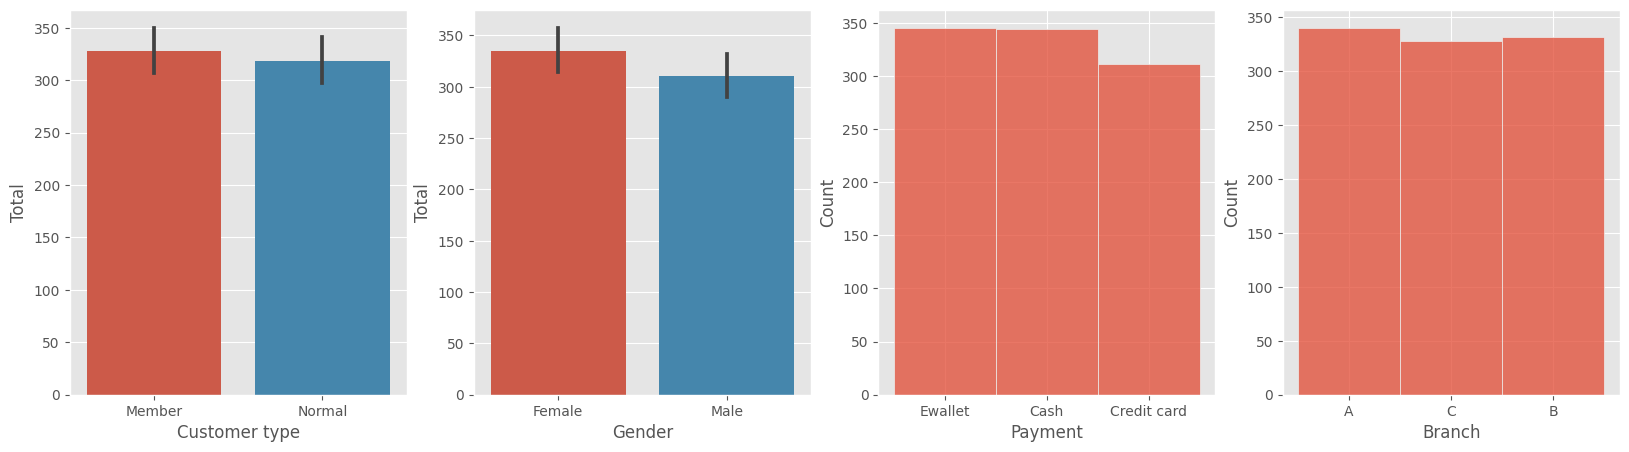

In [ ]:
# 1
fig, axs = plt.subplots(ncols=4 , figsize=(20,5))

sns.barplot(x='Gender', y='Total', data = df, ax=axs[1] )

sns.barplot(x='Customer type', y='Total', data = df, ax=axs[0])

sns.histplot(x='Payment', data = df, ax=axs[2])

sns.histplot(x='Branch', data = df, ax=axs[3])


<Axes: xlabel='Gender', ylabel='Count'>

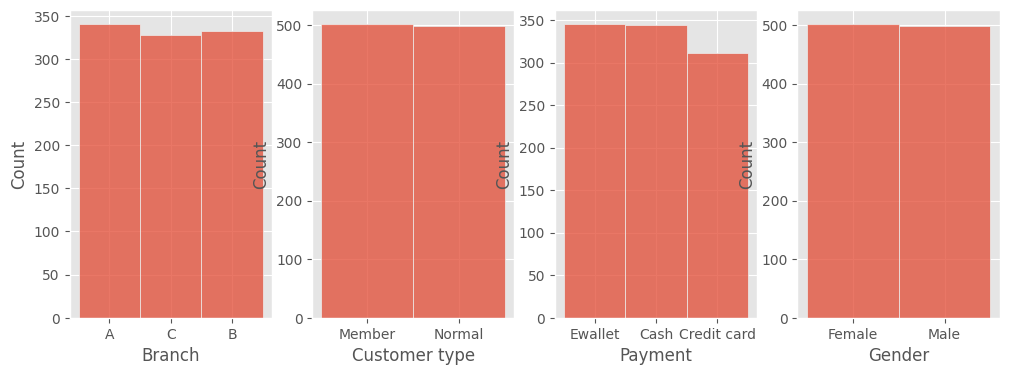

In [ ]:

fig, axs = plt.subplots(ncols=4 , figsize=multifigs_size)
sns.histplot(x='Payment', data = df, ax=axs[2])
sns.histplot(x='Customer type', data = df, ax=axs[1])
sns.histplot(x='Branch', data = df, ax=axs[0])
sns.histplot(x='Gender', data = df, ax=axs[3])

<Axes: xlabel='Product line', ylabel='Count'>

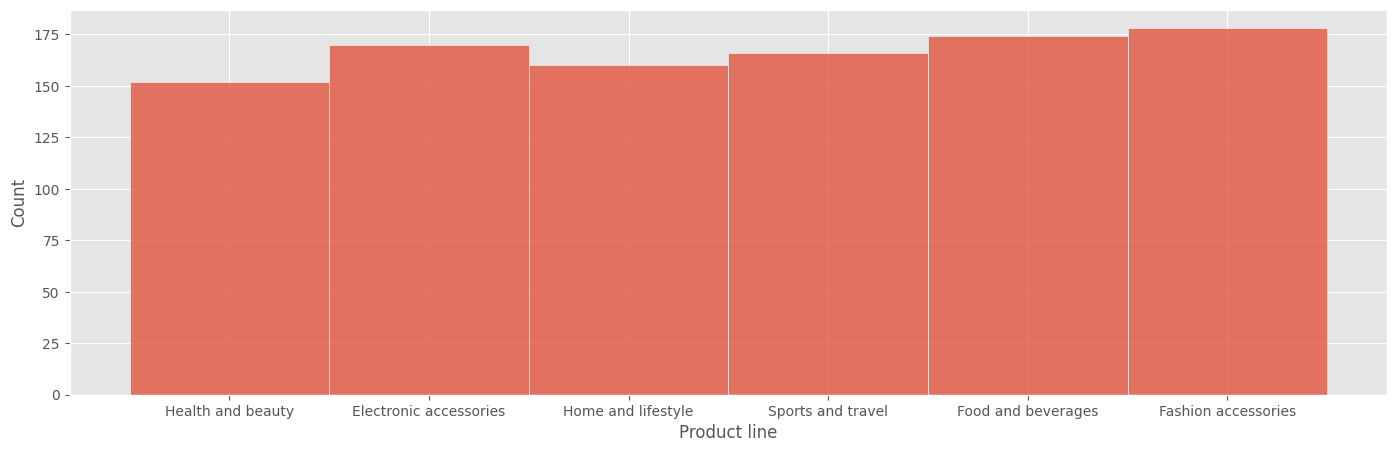

In [ ]:
plt.figure(figsize = (17,5))
sns.histplot(x='Product line', data = df)

<Axes: xlabel='Product line', ylabel='Total'>

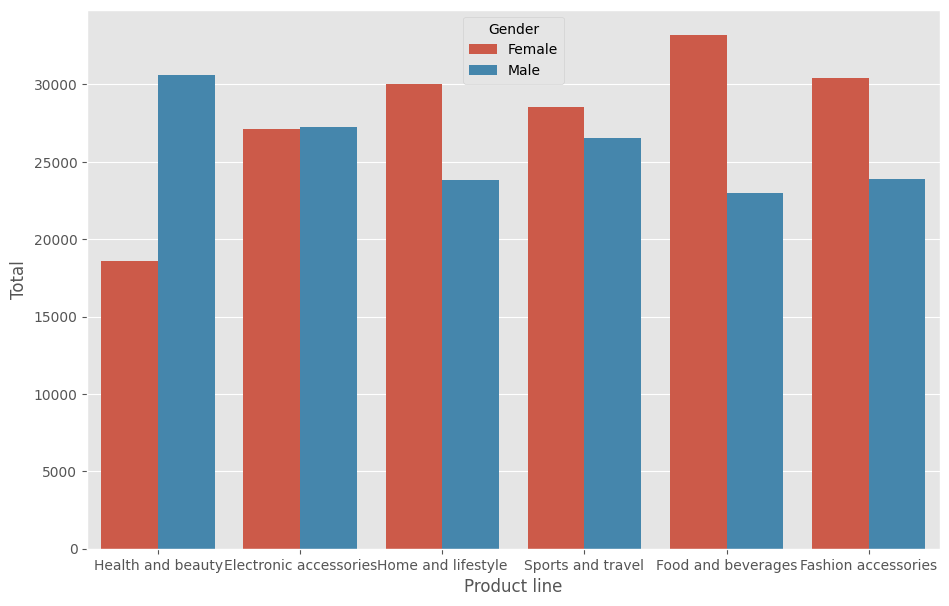

In [ ]:
plt.figure(figsize=(11,7))
sns.barplot(x='Product line', y = 'Total', hue = 'Gender', data = df, estimator = sum, ci = None)

In [ ]:
df_gender_product_line = df.groupby(['Gender', 'Product line'])['Total'].sum()
print(df_gender_product_line)

Gender  Product line          
Female  Electronic accessories    27102.0225
        Fashion accessories       30437.4000
        Food and beverages        33170.9175
        Health and beauty         18560.9865
        Home and lifestyle        30036.8775
        Sports and travel         28574.7210
Male    Electronic accessories    27235.5090
        Fashion accessories       23868.4950
        Food and beverages        22973.9265
        Health and beauty         30632.7525
        Home and lifestyle        23825.0355
        Sports and travel         26548.1055
Name: Total, dtype: float64


<Axes: title={'center': 'Total Sales for each Group of Gender and Product Line'}, xlabel='Gender,Product line'>

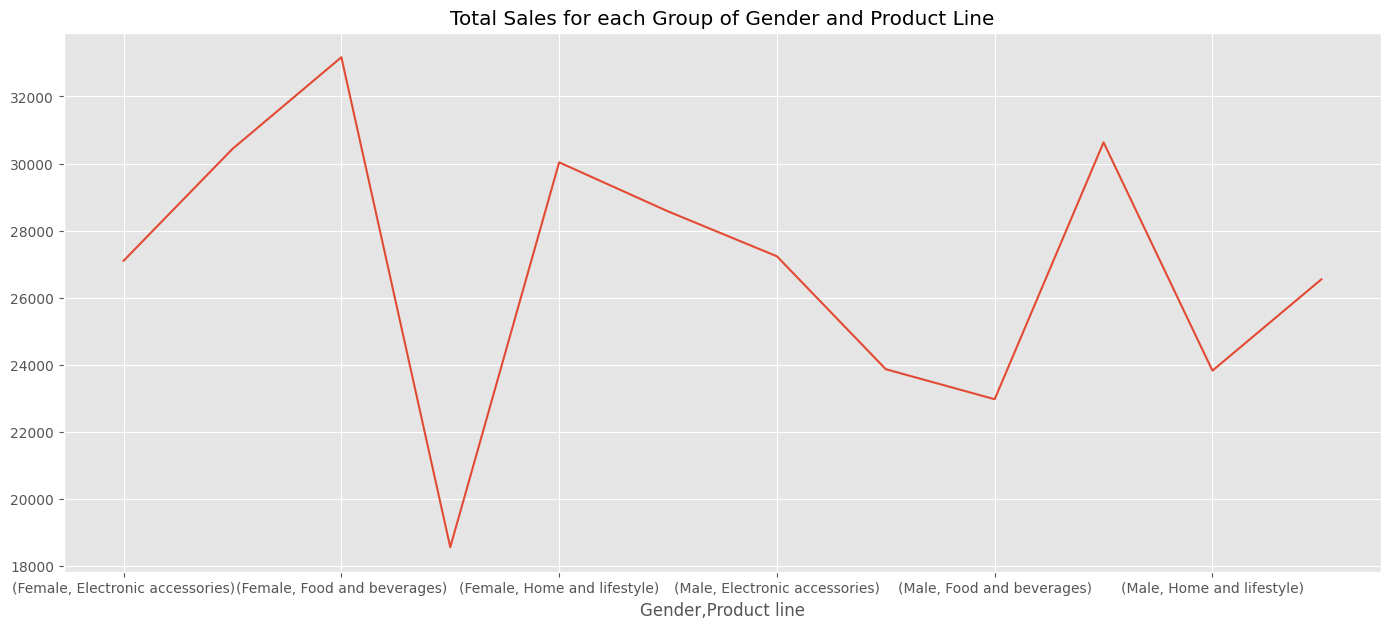

In [ ]:
plt.figure(figsize=(17,7))
df_gender_product_line.plot(kind='line', title = 'Total Sales for each Group of Gender and Product Line')

<Axes: title={'center': 'Total Sales for each Group of Gender and Product Line'}, ylabel='Gender,Product line'>

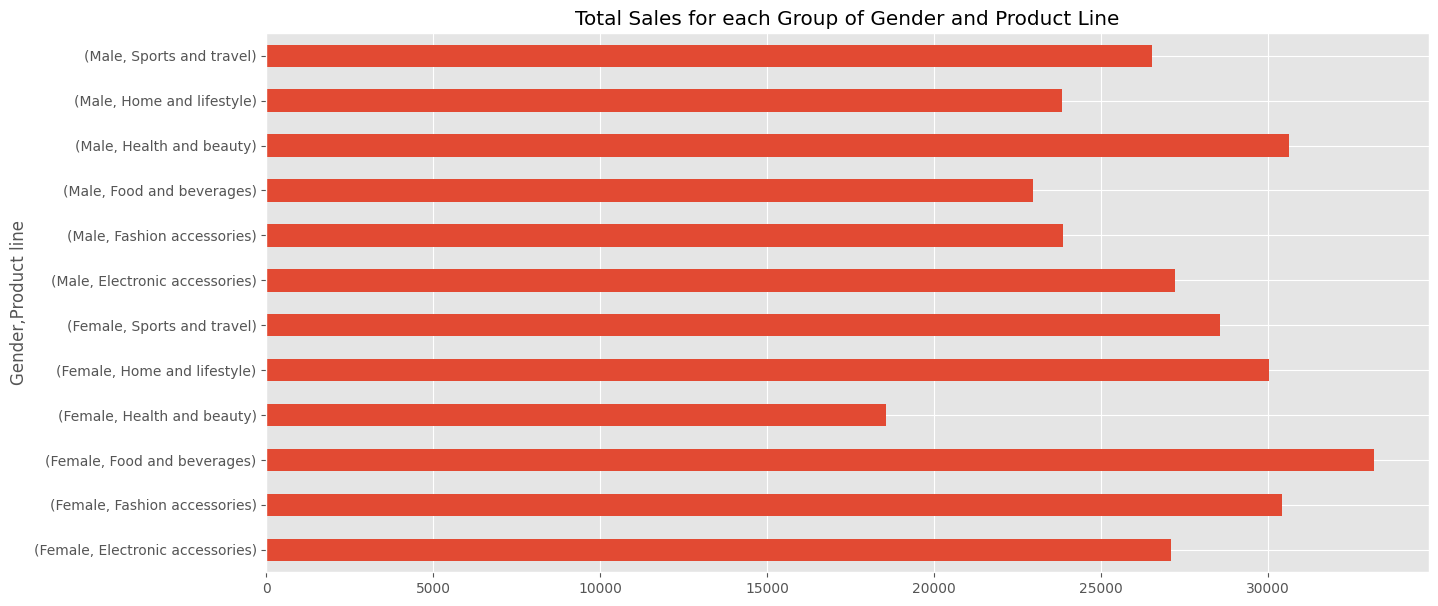

In [ ]:
plt.figure(figsize=(15,7))
df_gender_product_line.plot(kind='barh', title = 'Total Sales for each Group of Gender and Product Line')

In [ ]:
# 3. What is the average unit price for each product line?

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64


<Axes: title={'center': 'Average Unit Price For Each Product Line'}, ylabel='Product line'>

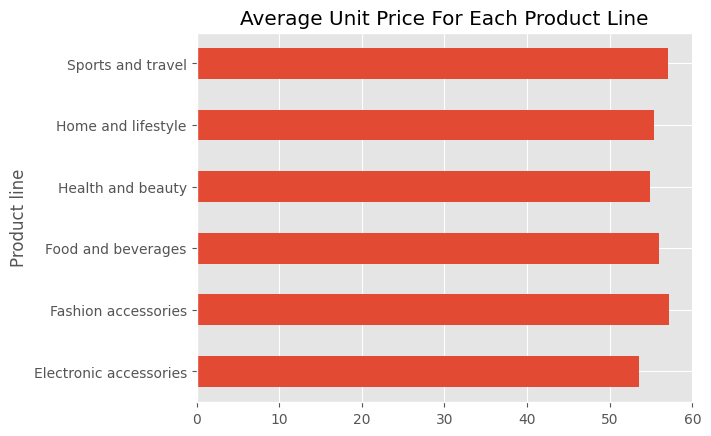

In [ ]:
df_product_line_price = df.groupby('Product line')['Unit price'].mean()
print(df_product_line_price)

# visualize the average unit price for each product line
df_product_line_price.plot(kind='barh', title = 'Average Unit Price For Each Product Line')

 Which cities are the biggest contributors to the overall sales?

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64


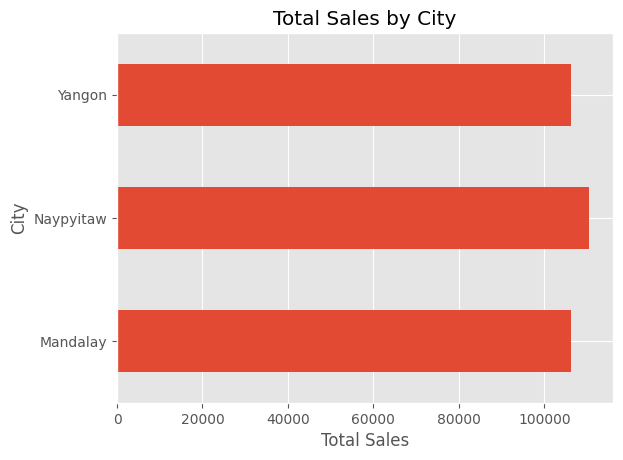

In [ ]:

# calculate the total sales for each city
df_city_sales = df.groupby('City')['Total'].sum()
print(df_city_sales)
# create a bar chart to visualize the total sales for each city
df_city_sales.plot(kind='barh')
# add title and labels to the plot
plt.title('Total Sales by City')
plt.ylabel('City')
plt.xlabel('Total Sales')
# show the plot
plt.show()

6. Which product lines are the most popular among customers?

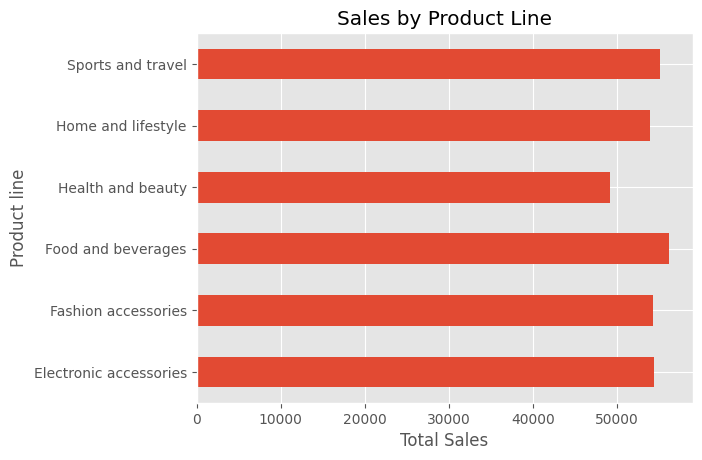

In [ ]:
df.groupby('Product line')['Total'].sum().plot(kind='barh')
# add title and labels to the plot
plt.title('Sales by Product Line')
plt.xlabel('Total Sales')
# show the plot
plt.show()

7. What is the relationship between the unit price and the quantity of each product?

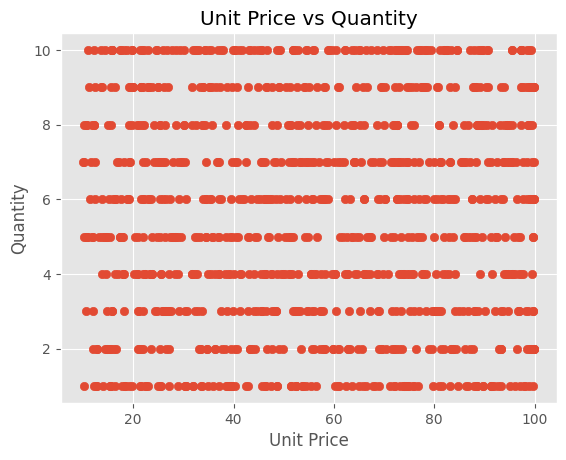

In [ ]:
# create a scatter plot to visualize the relationship
plt.scatter(df['Unit price'], df['Quantity'])
# add title and labels to the plot
plt.title('Unit Price vs Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
# show the plot
plt.show()

8. What is the overall satisfaction level of customers with the supermarket?

<Axes: ylabel='Rating'>

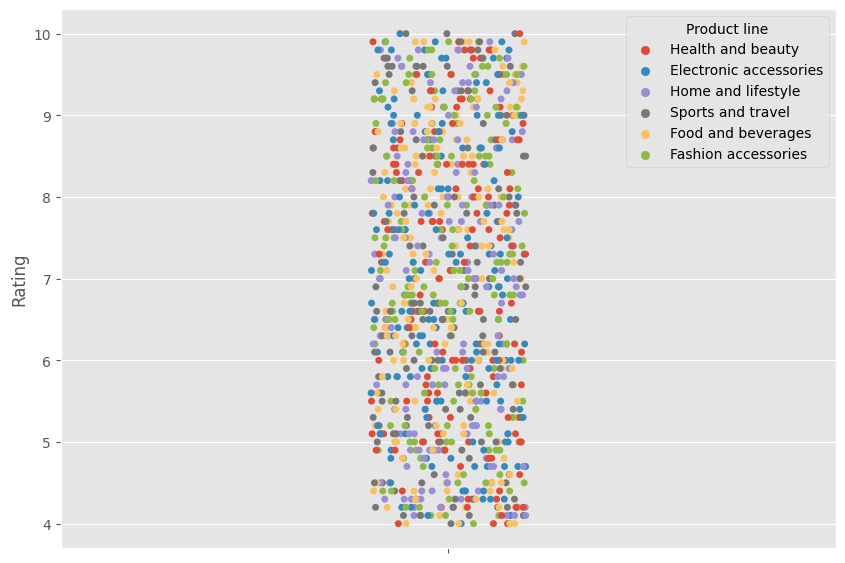

In [ ]:
plt.figure(figsize=(10,7))
sns.stripplot( y = 'Rating', hue = 'Product line', data=df )

<Axes: xlabel='Quantity', ylabel='Rating'>

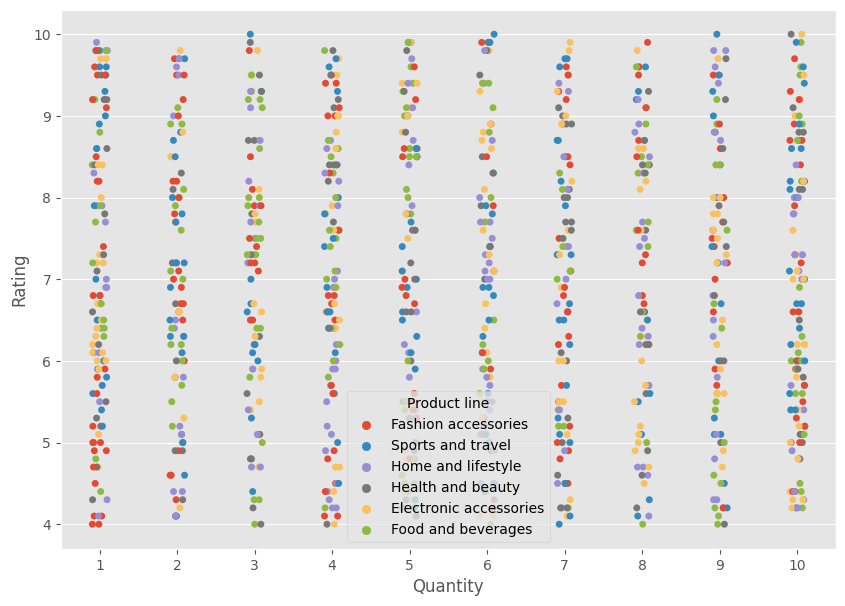

In [ ]:
plt.figure(figsize=(10,7))
sns.stripplot(x ='Quantity',  y = 'Rating', hue = 'Product line', data=df )

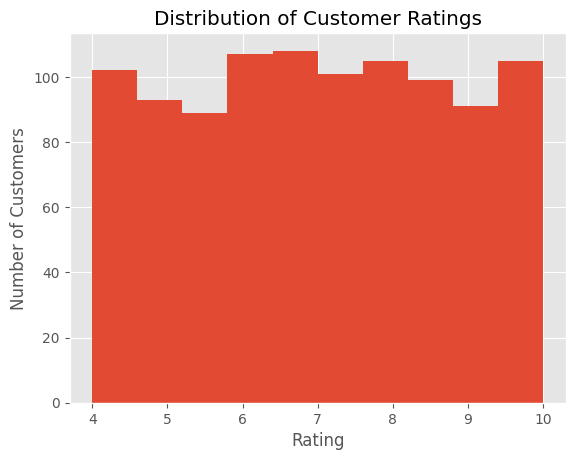

In [ ]:
df['Rating'].plot(kind='hist')
# add title and labels to the plot
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Customers')
# show the plot
plt.show()

In [ ]:
bins = np.linspace(min(df["Rating"]), max(df["Rating"]), 4)

group_names = ['Low', 'Medium', 'High'] # let's set our group names

df['rating-binned'] = pd.cut(df['Rating'], bins, labels=group_names, include_lowest=True )
df[['Rating','rating-binned']].head(20)

,Rating,rating-binned
0,9.1,High
1,9.6,High
2,7.4,Medium
3,8.4,High
4,5.3,Low
5,4.1,Low
6,5.8,Low
7,8.0,Medium
8,7.2,Medium
9,5.9,Low


In [ ]:

df["rating-binned"].value_counts()

Medium    351
Low       341
High      308
Name: rating-binned, dtype: int64

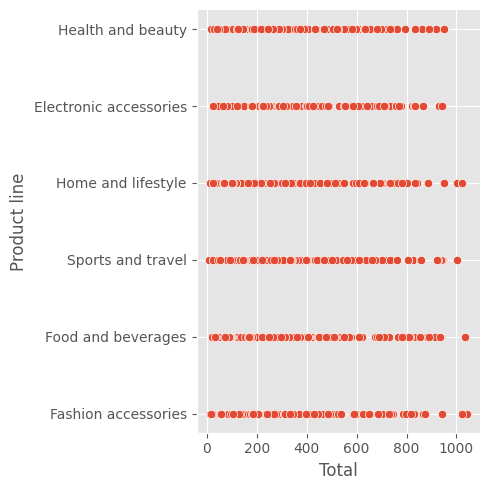

In [ ]:
sns.relplot(y = 'Product line', x = 'Total', data=df )

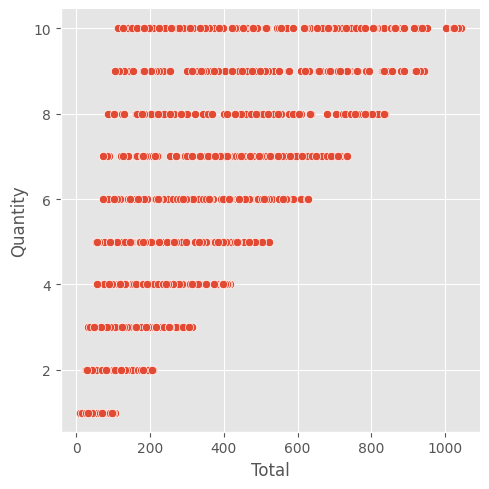

In [ ]:
sns.relplot(x="Total",  y = "Quantity", data =df)

Text(0.5, 1.0, 'Distribution of Customer Rating bins')

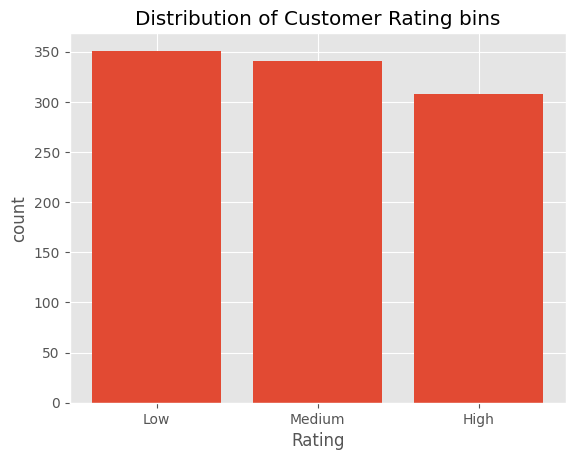

In [ ]:
plt.bar(group_names, df["rating-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("Rating")
plt.ylabel("count")
plt.title("Distribution of Customer Rating bins")

Most popular product lines:
Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64


<Axes: title={'center': 'Most Popular Product Lines'}, xlabel='Product line'>

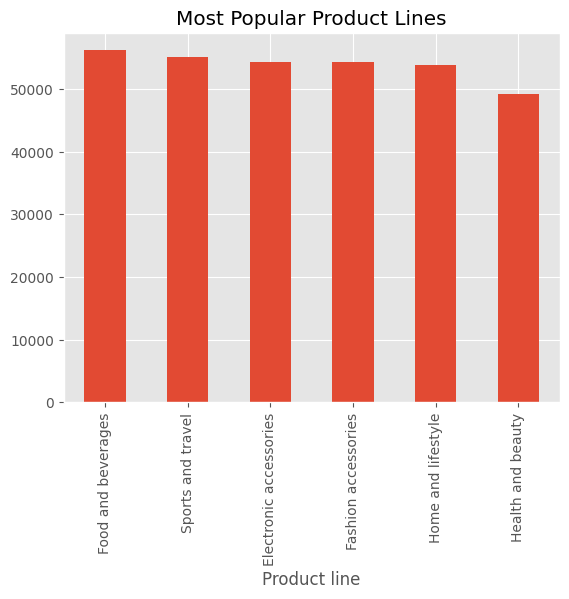

In [ ]:
# group the data by product line and calculate the total sales for each product line
product_line_sales = df.groupby('Product line')['Total'].sum()

# sort the product lines by total sales in descending order
product_line_sales = product_line_sales.sort_values(ascending=False)

# print the most popular product lines
print('Most popular product lines:')
print(product_line_sales.head(10))

# visualize the most popular product lines
product_line_sales.head(10).plot(kind='bar', title = 'Most Popular Product Lines')

11. What are the most profitable product lines in the supermarket?

Most profitable product lines:


Text(0.5, 0, 'profit')

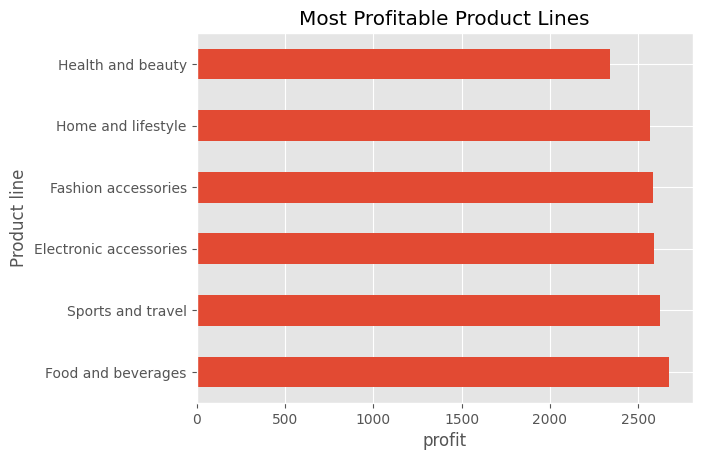

In [ ]:
# group the data by product line and calculate the total gross income for each product line
product_line_income = df.groupby('Product line')['gross income'].sum()
# sort the product lines by total gross income in descending order
product_line_income = product_line_income.sort_values(ascending=False)
# print the top 10 most profitable product lines
print('Most profitable product lines:')
# visualize the most profitable product lines
product_line_income.head(10).plot(kind='barh', title = 'Most Profitable Product Lines')
plt.xlabel('profit')

Most popular payment methods:
Payment
Cash           112206.570
Ewallet        109993.107
Credit card    100767.072
Name: Total, dtype: float64


<Axes: title={'center': 'Most Popular Payment Methods'}, xlabel='Payment', ylabel='Total Sales'>

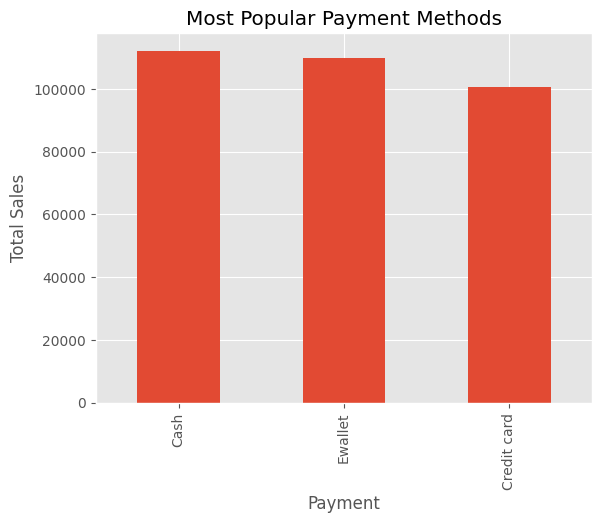

In [ ]:
# group the data by payment method and calculate the total sales for each payment method
payment_method_sales = df.groupby('Payment')['Total'].sum()

# sort the payment methods by total sales in descending order
payment_method_sales = payment_method_sales.sort_values(ascending=False)

# print the most popular payment methods
print('Most popular payment methods:')
print(payment_method_sales.head(10))

# visualize the most popular payment methods
plt.ylabel('Total Sales')
payment_method_sales.head(10).plot(kind='bar', title = 'Most Popular Payment Methods')

Most popular payment methods:
Payment
Cash           112206.570
Ewallet        109993.107
Credit card    100767.072
Name: Total, dtype: float64


<Axes: title={'center': 'Most Popular Payment Methods'}, xlabel='Payment', ylabel='Total Sales'>

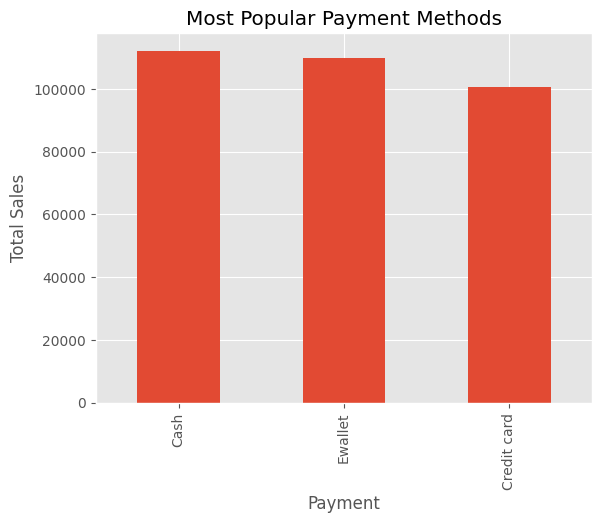

In [ ]:
# group the data by payment method and calculate the total sales for each payment method
payment_method_sales = df.groupby('Payment')['Total'].sum()

# sort the payment methods by total sales in descending order
payment_method_sales = payment_method_sales.sort_values(ascending=False)

# print the most popular payment methods
print('Most popular payment methods:')
print(payment_method_sales.head(10))

# visualize the most popular payment methods
plt.ylabel('Total Sales')
payment_method_sales.head(10).plot(kind='bar', title = 'Most Popular Payment Methods')

<Axes: xlabel='Payment', ylabel='Total'>

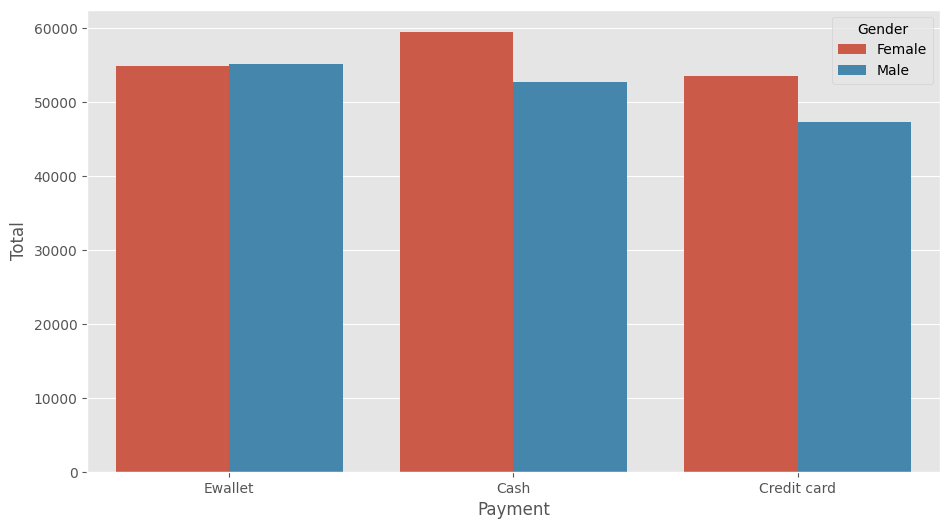

In [ ]:
# total sales for each gender by payment method

plt.figure(figsize = (11,6))
sns.barplot(x = 'Payment', y = 'Total', hue = 'Gender', data = df, ci = None, estimator = sum)

<Axes: xlabel='Payment', ylabel='Total'>

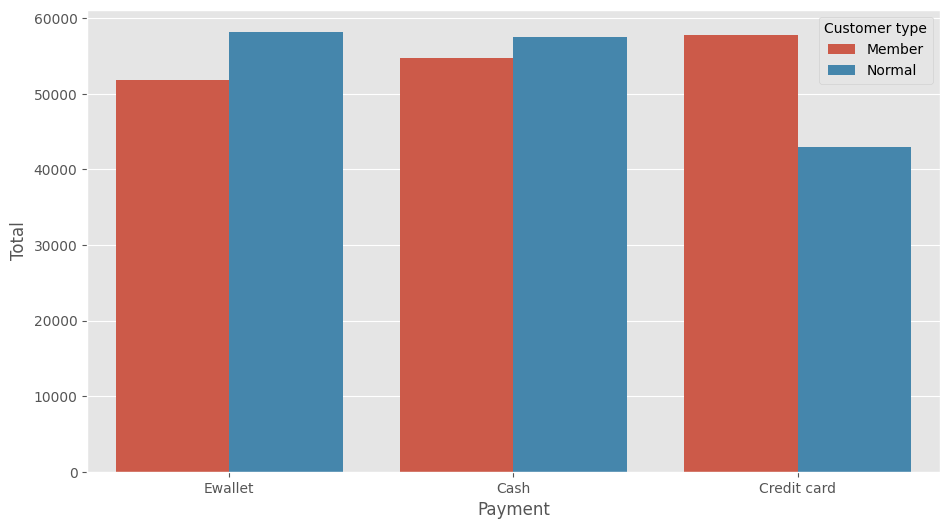

In [ ]:
plt.figure(figsize = (11,6))
sns.barplot(x = 'Payment', y = 'Total', hue = 'Customer type', data = df, ci = None, estimator = sum)

What are the average unit prices and quantities sold for each product line?

In [ ]:
# group the data by product line and calculate the average unit price and quantity for each product line
product_line_data = df.groupby('Product line')['Unit price', 'Quantity'].mean()

# print the average unit prices and quantities for each product line
print('Average unit prices and quantities for each product line:')
print(product_line_data)



Average unit prices and quantities for each product line:
                        Unit price  Quantity
Product line                                
Electronic accessories   53.551588  5.711765
Fashion accessories      57.153652  5.067416
Food and beverages       56.008851  5.471264
Health and beauty        54.854474  5.618421
Home and lifestyle       55.316937  5.693750
Sports and travel        56.993253  5.542169


<Axes: title={'center': 'Average Unit Price Per Product Line'}, xlabel='Product line'>

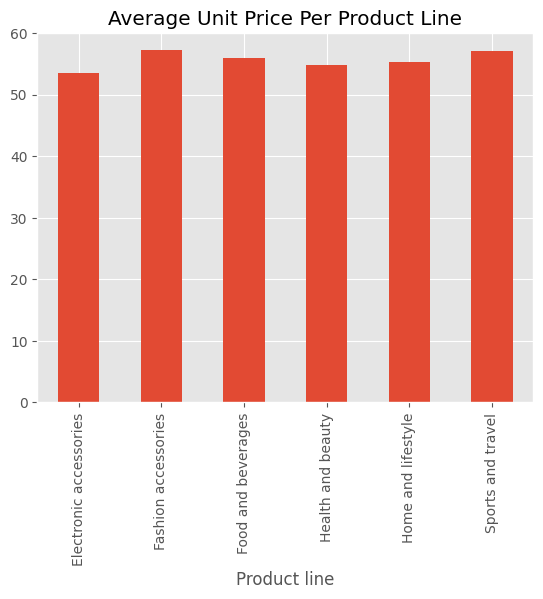

In [ ]:
# don bien
product_line_data['Unit price'].plot(kind='bar', title = 'Average Unit Price Per Product Line')

<Axes: title={'center': 'Average Quantities Per Product Line'}, xlabel='Product line'>

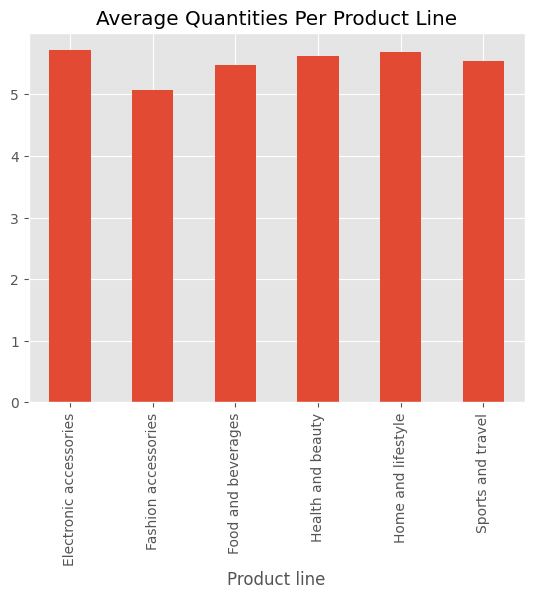

In [ ]:
# phan tich don bien ve san pham Product line
product_line_data['Quantity'].plot(kind='bar', title = 'Average Quantities Per Product Line')

<Axes: title={'center': 'Average Unit Price and Quantities Per Product Line'}, ylabel='Product line'>

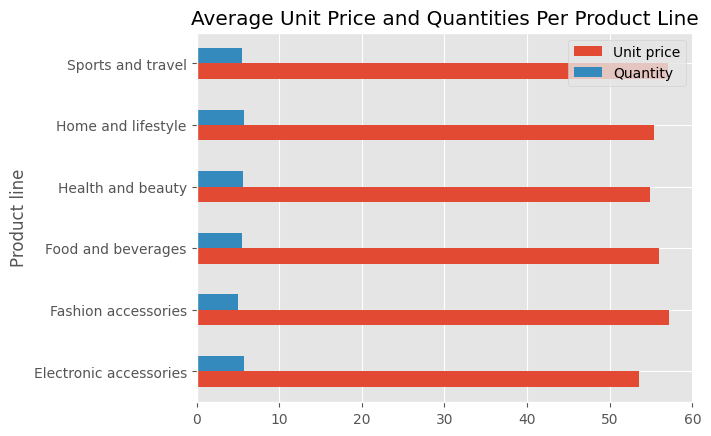

In [ ]:
# visualize the average unit price and quantities for each product line
product_line_data.head(10).plot(kind='barh', title = 'Average Unit Price and Quantities Per Product Line')

Average gross margins and gross incomes for each product line:


<Axes: title={'center': 'Average Gross Margins and Gross Incomes Per Product Line'}, ylabel='Product line'>

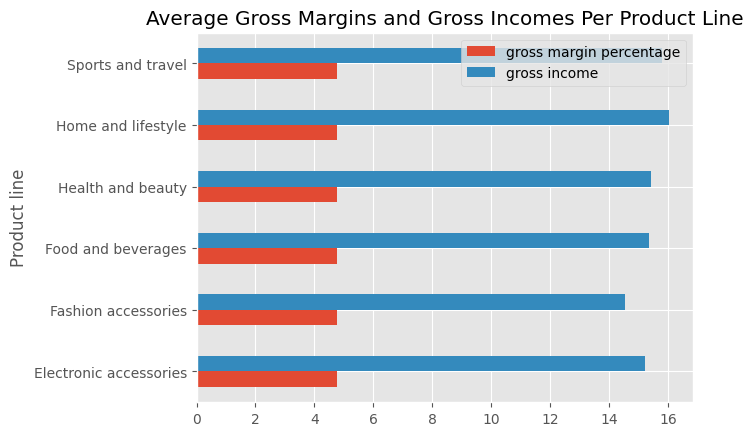

In [ ]:
# group the data by product line and calculate the average gross margin and gross income for each product line
product_line_dataa = df.groupby('Product line')['gross margin percentage', 'gross income'].mean()
# print the average gross margins and gross incomes for each product line
print('Average gross margins and gross incomes for each product line:')
# visualize the average gross margins and gross incomes for each product line
product_line_dataa.head(10).plot(kind='barh', title = 'Average Gross Margins and Gross Incomes Per Product Line')

Average customer ratings for each product line:
Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


<Axes: title={'center': 'Average Customer Ratings Per Product Line'}, xlabel='Product line'>

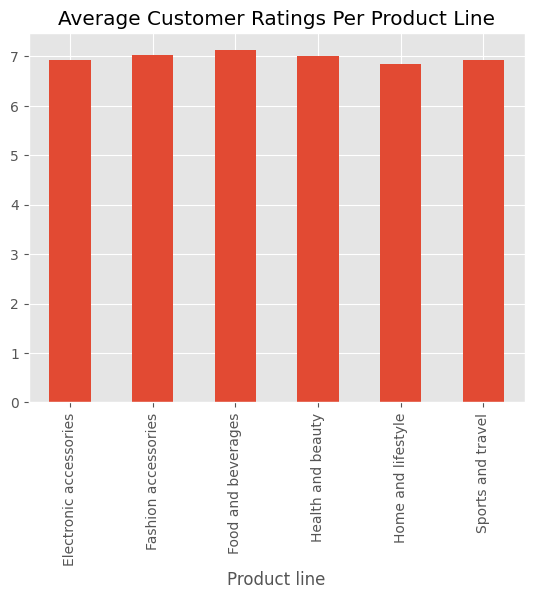

In [ ]:
# group the data by product line and calculate the average customer rating for each product line
product_line_datta = df.groupby('Product line')['Rating'].mean()

# print the average customer ratings for each product line
print('Average customer ratings for each product line:')
print(product_line_datta)

# visualize the average customer ratings for each product line
product_line_datta.head(10).plot(kind='bar', title = 'Average Customer Ratings Per Product Line')

<Axes: xlabel='Total', ylabel='Product line'>

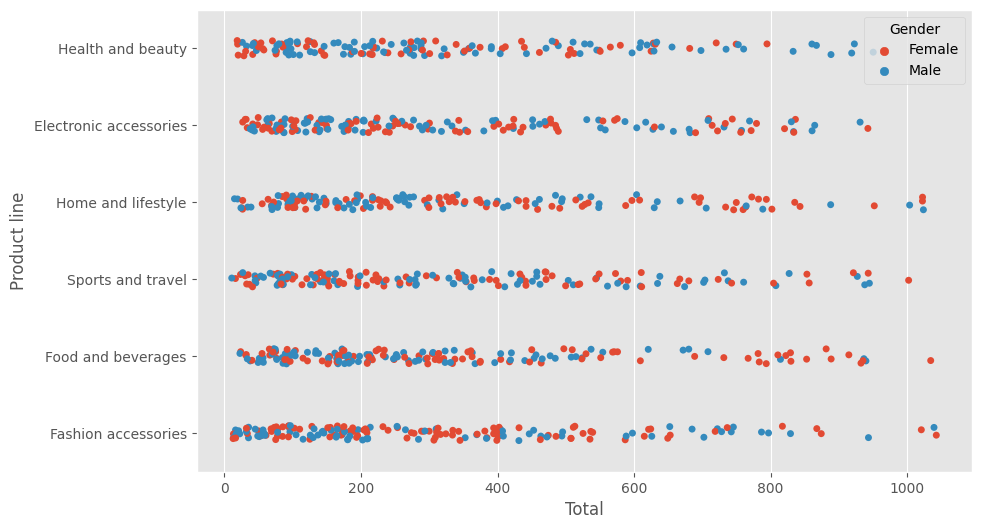

In [ ]:
plt.figure(figsize = (10,6))
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=df )

Most popular cities:
                 Total              Rating          
                   sum        mean     sum      mean
City                                                
Naypyitaw  110568.7065  337.099715  2319.9  7.072866
Yangon     106200.3705  312.354031  2389.2  7.027059
Mandalay   106197.6720  319.872506  2263.6  6.818072


<Axes: title={'center': 'Most Popular Cities in Sales and Customer Ratings'}, xlabel='City'>

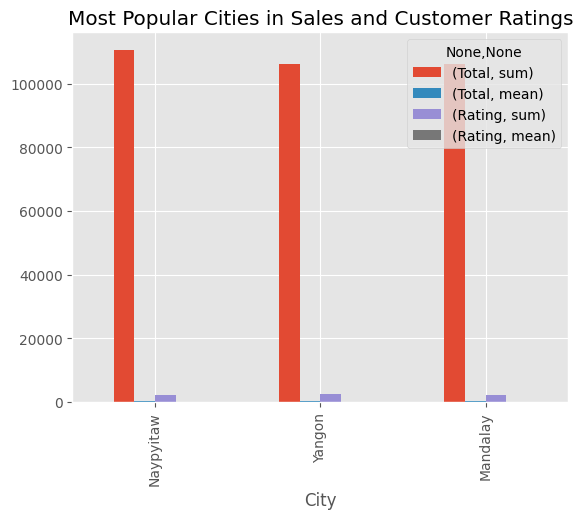

In [ ]:
# group the data by city and calculate the total sales and average customer rating for each city
city_data = df.groupby('City')['Total', 'Rating'].agg(['sum', 'mean'])

# sort the cities by total sales in descending order
city_data = city_data.sort_values(('Total', 'sum'), ascending=False)

# print the most popular cities in terms of sales and customer ratings
print('Most popular cities:')
print(city_data.head(10))

# visualize the most popular cities in terms of sales and customer ratings
city_data.head(10).plot(kind='bar', title = 'Most Popular Cities in Sales and Customer Ratings')

Date
February     97219.374
January     116291.868
March       109455.507
Name: Total, dtype: float64


<Axes: title={'center': 'Monthly Sales'}, xlabel='Date', ylabel='Total Sales'>

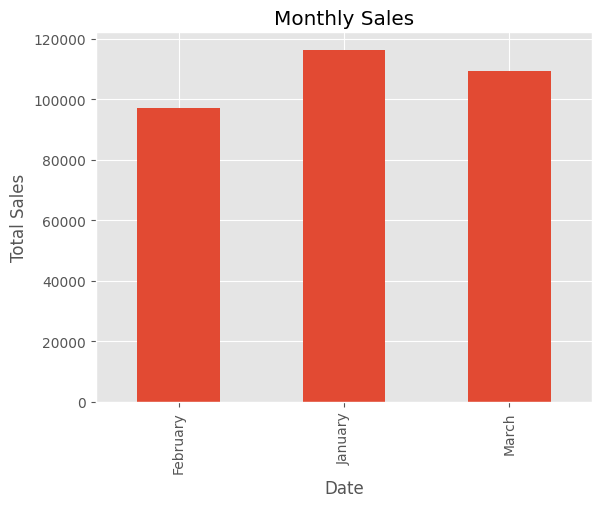

In [ ]:
# calculate the total sales per month
df['Date'] = pd.to_datetime(df['Date'])

monthly_sales = df.groupby(df['Date'].dt.strftime('%B'))['Total'].sum()
print(monthly_sales)
# visualize the monthly sales
plt.ylabel('Total Sales')
monthly_sales.plot(kind='bar', title = 'Monthly Sales')

Date
00    46
01    72
02    82
03    89
04    83
05    95
06    70
07    64
08    82
09    90
10    84
11    71
12    72
Name: Invoice ID, dtype: int64


<Axes: title={'center': 'Transactions Per Week'}, xlabel='Date'>

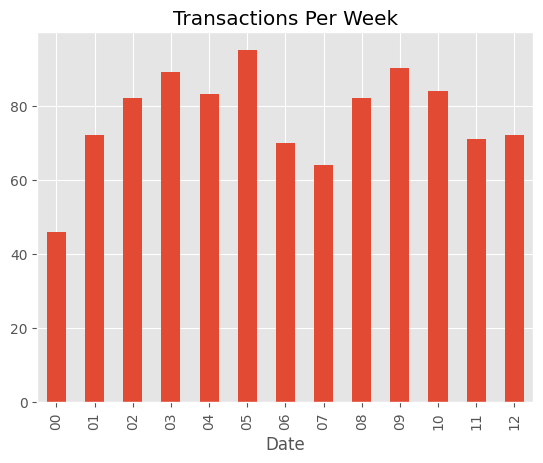

In [ ]:
# calculate the total number of transactions per week
df['Date'] = pd.to_datetime(df['Date'])
transactions_per_week = df.groupby(df['Date'].dt.strftime('%U'))['Invoice ID'].nunique()

# print the results
print(transactions_per_week)

# visualize the transactions per week
transactions_per_week.plot(kind='bar', title = 'Transactions Per Week')

Date
Fri    139
Mon    125
Sat    164
Sun    133
Thu    138
Tue    158
Wed    143
Name: Invoice ID, dtype: int64


<Axes: title={'center': 'Transaction Per Day'}, xlabel='Date'>

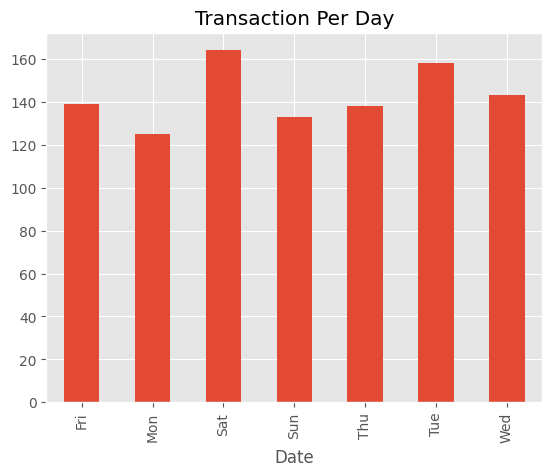

In [ ]:
# calculate the total number of transactions per day
df['Date'] = pd.to_datetime(df['Date'])
transactions_per_day = df.groupby(df['Date'].dt.strftime('%a'))['Invoice ID'].nunique()

# print the results
print(transactions_per_day)

# visualize the transactions per day
transactions_per_day.plot(kind='bar', title='Transaction Per Day')

Time
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
Name: Invoice ID, dtype: int64


<Axes: title={'center': 'Transactions Per Hour'}, xlabel='Time'>

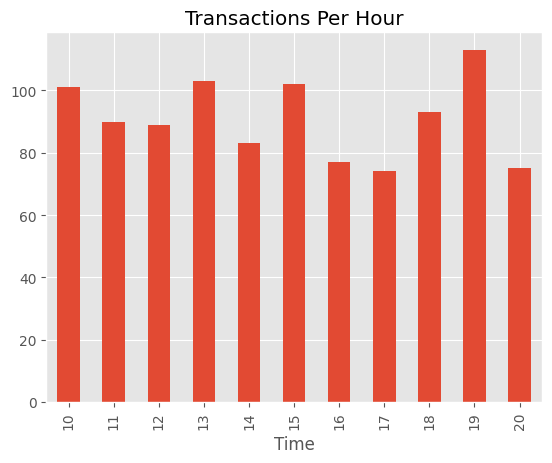

In [ ]:
# calculate the total number of transactions per hour
df['Time'] = pd.to_datetime(df['Time'])
transactions_per_hour = df.groupby(df['Time'].dt.strftime('%H'))['Invoice ID'].nunique()

print(transactions_per_hour)

# visualize the transactions per hour
transactions_per_hour.plot(kind='bar', title = 'Transactions Per Hour')

In [ ]:
# group the data by product line and day of the week and calculate the total quantity sold for each group
product_data = df.groupby(['Product line', df['Date'].dt.strftime('%a')])['Quantity'].sum()

# select the groups for weekends and weekdays
weekend_data = product_data.loc[:, ['Sat', 'Sun']]
weekday_data = product_data.loc[:, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']]

# sum the quantities for each product line on weekends and weekdays
weekend_data = weekend_data.groupby('Product line').sum()
weekday_data = weekday_data.groupby('Product line').sum()

# sort the data in descending order
weekend_data = weekend_data.sort_values(ascending=False)
weekday_data = weekday_data.sort_values(ascending=False)

Top products sold on weekdays:


Text(0.5, 0, 'Quantity')

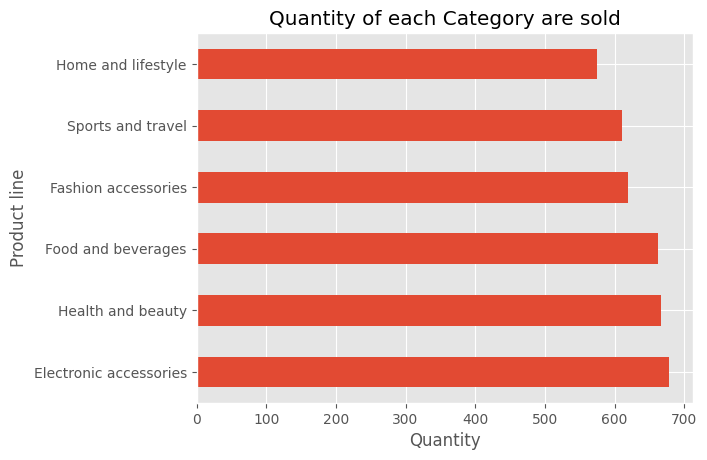

In [ ]:
print('Top products sold on weekdays:')
# visualize the top products sold on weekdays
weekday_data.head(10).plot(kind='barh', title = 'Quantity of each Category are sold')
plt.xlabel('Quantity')

Top products sold on weekends:
Product line
Home and lifestyle        336
Sports and travel         309
Electronic accessories    293
Food and beverages        290
Fashion accessories       282
Health and beauty         187
Name: Quantity, dtype: int64


<Axes: title={'center': 'Top Products Sold on Weekends'}, xlabel='Product line'>

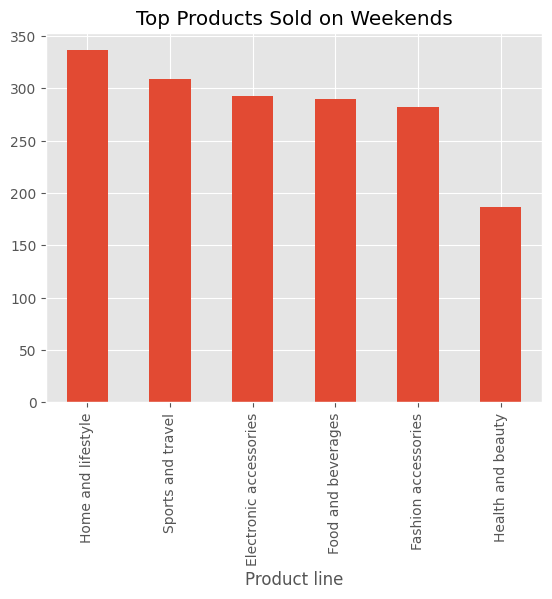

In [ ]:
print('Top products sold on weekends:')
print(weekend_data.head(10))

# visualize the top products sold on weekends
weekend_data.head(10).plot(kind='bar', title = 'Top Products Sold on Weekends')

In [ ]:
# group the data by gender, customer type, payment method, and date and time and calculate the total quantity sold for each group
transaction_data = df.groupby(['Gender', 'Customer type', 'Payment', 'Date', 'Time'])['Quantity'].sum()

# print the top 10 groups with the highest total quantity sold
print('Top 10 groups with the highest total quantity sold:')
print(transaction_data.sort_values(ascending=False).head(10))

Top 10 groups with the highest total quantity sold:
Gender  Customer type  Payment      Date        Time               
Male    Normal         Ewallet      2019-03-29  2023-07-26 10:25:00    10
        Member         Credit card  2019-02-14  2023-07-26 11:26:00    10
Female  Member         Ewallet      2019-01-30  2023-07-26 20:23:00    10
                                    2019-02-10  2023-07-26 12:28:00    10
                                    2019-02-22  2023-07-26 12:30:00    10
Male    Member         Credit card  2019-03-20  2023-07-26 19:57:00    10
Female  Member         Ewallet      2019-03-05  2023-07-26 16:24:00    10
                                    2019-03-08  2023-07-26 10:53:00    10
Male    Member         Credit card  2019-03-17  2023-07-26 19:06:00    10
Female  Member         Ewallet      2019-03-18  2023-07-26 17:38:00    10
Name: Quantity, dtype: int64


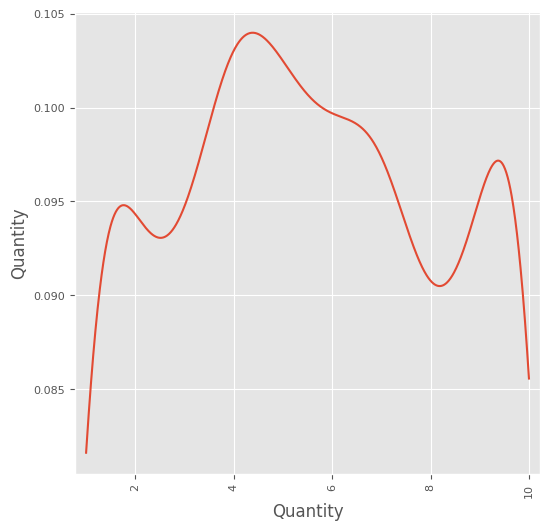

In [ ]:
from pandas.plotting import scatter_matrix

transaction_data = transaction_data.to_frame()

# create a scatter matrix plot of the data
scatter_matrix(transaction_data, alpha=0.2, figsize=(6, 6), diagonal='kde')

# show the plot
plt.show()

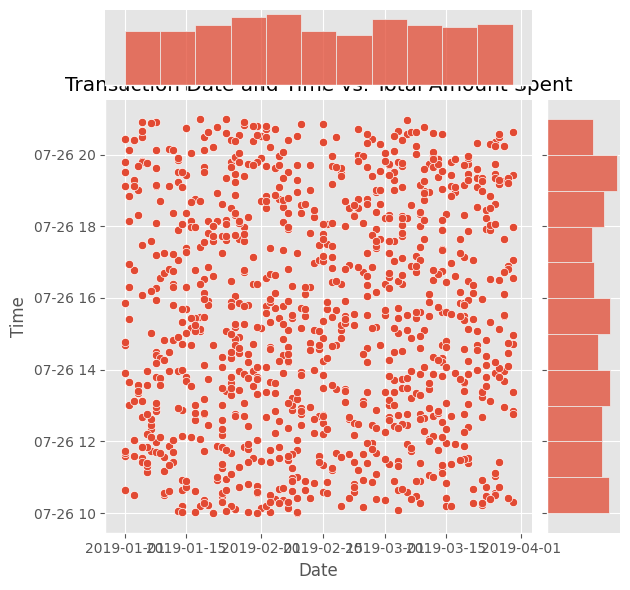

In [ ]:
sns.jointplot(x='Date', y='Time', data=transaction_data, kind='scatter')

# add labels and title
plt.xlabel('Date')
plt.ylabel('Time')
plt.title('Transaction Date and Time vs. Total Amount Spent')

# show the plot
plt.show()

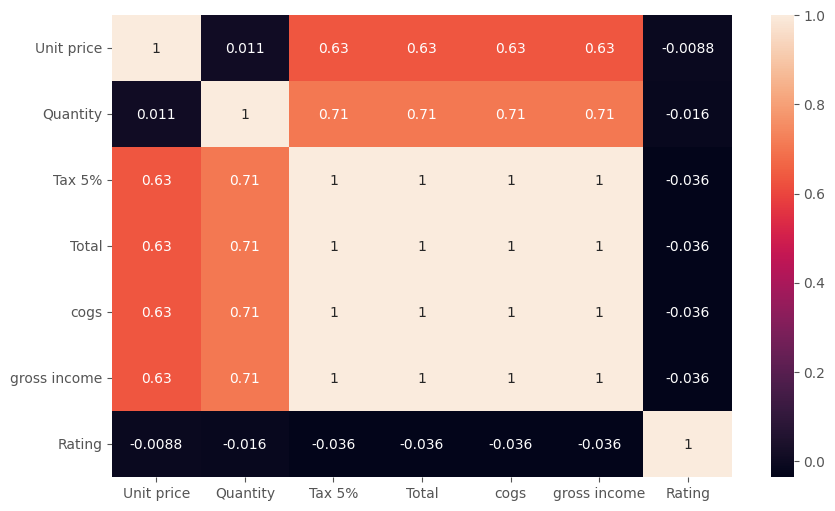

In [ ]:
# object_columns = df.select_dtypes(include=['object']).columns
# df_object = df.drop(columns=object_columns)
# df_object =df_object.drop('Time',  axis =1)
# df_object =df_object.drop('Date',  axis =1)
# df_object =df_object.drop('rating-binned',  axis =1)
# corr=df_object.corr()
# plt.figure(figsize=(10,8))
# sns.heatmap(corr,annot=True)
# plt.show()

df_object = supermarket_df.copy()
object_columns = df_object.select_dtypes(include=['object']).columns
df_object =  df_object.drop(columns=object_columns)
df_object =df_object.drop('gross margin percentage',  axis =1)
corr=df_object.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)
plt.show()
